# Data Fusion TP 2 - Fusion de capteurs

Titouan Vayer & Ludovic Darmet

### Import

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exercice 1 : Variances connues

### Question 1

In [2]:
sigma1 = 0.1
sigma2 = 0.2

n1 = 5
n2 = 10

x_MLE = np.zeros((1000,1))
x_mean = np.zeros((1000,1))

### Calcul de l'agrégat par max de vraisemblance

In [3]:
for i in range(1000):
    x1 = np.random.normal(0,sigma1,(n1,1))
    x2 = np.random.normal(0,sigma2,(n2,1))
    x1_barre = np.mean(x1)
    x2_barre = np.mean(x2)

    x_MLE[i] = (sigma2**2*x1_barre+ sigma1**2*x2_barre)/(n1*sigma2**2+sigma1**2*n2)
    x_mean[i] = np.mean(np.concatenate((x1,x2)))

### Plot

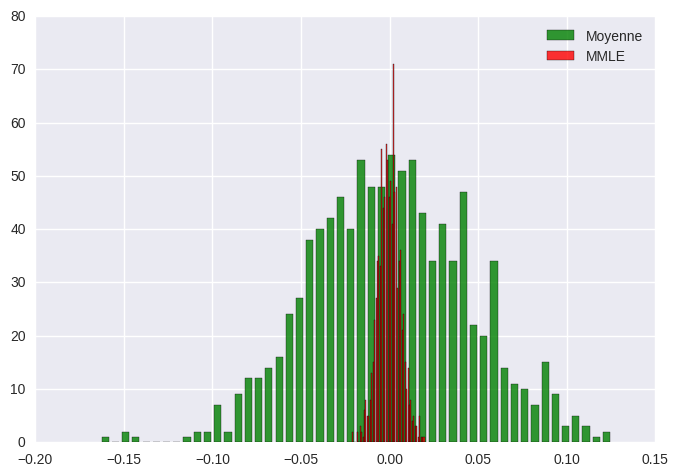

In [4]:
hist, bins = np.histogram(x_mean, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='g',alpha=0.8)
hist, bins = np.histogram(x_MLE, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='r',alpha=0.8)
plt.legend(['Moyenne','MMLE'])

## Généralisation en faisant varier n1 et n2

In [5]:
%%time

std_MLE = np.zeros((20,20))

for i in range(20):
    for j in range(20):
        x_MLE = np.zeros((1000,1))
        for k in range(1000): # Boucle for for life
            x1 = np.random.normal(0,sigma1,(i+1,1))
            x2 = np.random.normal(0,sigma2,(j+1,1))
            x1_barre = np.mean(x1)
            x2_barre = np.mean(x2)

            x_MLE[k] = (sigma2**2*x1_barre+ sigma1**2*x2_barre)/((i+1)*sigma2**2+sigma1**2*(j+1))
            
        std_MLE[i,j] = np.std(x_MLE)

CPU times: user 8.4 s, sys: 0 ns, total: 8.4 s
Wall time: 8.4 s


### Plot

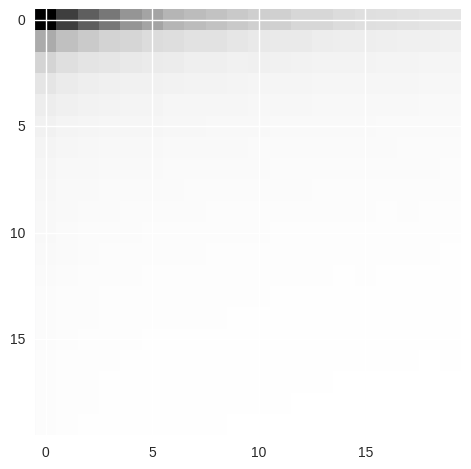

In [6]:
plt.imshow(std_MLE,interpolation='none')

Il semblerait que la source 1 est plus intéressante car, seule, il y a besoin de moins d'observations (5) pour avoir une variance d'estimateur proche de 0 que pour la source 2. 
De même en combinant les deux sources.

### Question 3

#### Calcul de l'aggrégat par maximum a posterior

In [7]:
sigma1 = 0.1
sigma2 = 0.2
sigma0 = std_MLE[2,2]

n1 = 3
n2 = 3

x_MLE = np.zeros((1000,1))
x_mean = np.zeros((1000,1))
x_MAP = np.zeros((1000,1))


for i in range(1000):
    x1 = np.random.normal(0,sigma1,(n1,1))
    x2 = np.random.normal(0,sigma2,(n2,1))
    x1_barre = np.mean(x1)
    x2_barre = np.mean(x2)
    
    x_MLE[i] = (sigma2**2*x1_barre+ sigma1**2*x2_barre)/(n1*sigma2**2+sigma1**2*n2)
    x_mean[i] = np.mean(np.concatenate((x1,x2)))
    x_MAP[i] = ((x1_barre/(sigma1**2))+(x2_barre/(sigma2**2))+(x_MLE[i]/(sigma0**2)))/((n1/(sigma1**2))+(n2/(sigma2**2))+(1/(sigma0**2)))

### Plot

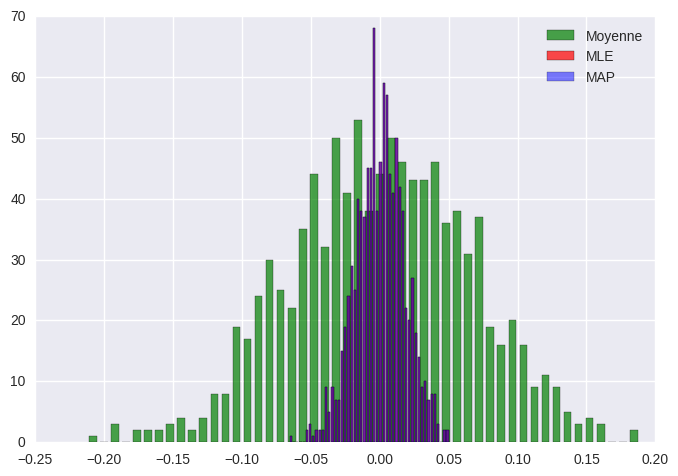

In [8]:
hist, bins = np.histogram(x_mean, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='g',alpha=0.7)
hist, bins = np.histogram(x_MLE, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='r',alpha=0.7)
hist, bins = np.histogram(x_MAP, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='b',alpha=0.5)
plt.legend(['Moyenne','MLE','MAP'])

Le la différence entre MAP et MLE est très très faible. Même difficile à voir sur ce graphique. 

Le gain ne semble donc pas sigificatif contrairement à calculer le MLE à la place de la moyenne qui permet de réduire significativement la variance de notre estimateur.

## Exercice 2 : Fusion de capteurs de variances inconnues

En injectant $(12)$ et $(13)$ dans $(14)$ on obtient une équation du type $g(x_{*}) = x_{*}$  avec $g$ dérivable et $\forall x_{*}$ $|g'(x_{*})| < 1$. On va donc pouvoir appliquer la méthode du point fixe pour trouver $x_{*}$.

In [9]:
sigma1 = 0.1
sigma2 = 0.2

n1 = 5
n2 = 10

x_MLE = np.zeros((1000,1))
x_mean = np.zeros((1000,1))

In [10]:
for i in range(1000):
    x1 = np.random.normal(0,sigma1,(n1,1))
    x2 = np.random.normal(0,sigma2,(n2,1))
    x1_barre = np.mean(x1)
    x2_barre = np.mean(x2)
    u=1
    epsilon=5

    
    while epsilon>0.01: # Point fixe : on s'arrête quand le critère de convergence est atteint.
        t = ((1/n1)*np.sum((x1-u)**2)+(1/n2)*np.sum((x2-u)**22)/(np.sum((x1-u)**2)+np.sum((x2-u)**2)))
        epsilon = np.abs(t-u)
        u=t

    x_MLE[i] = u
    x_mean[i] = np.mean(np.concatenate((x1,x2)))

## Plot

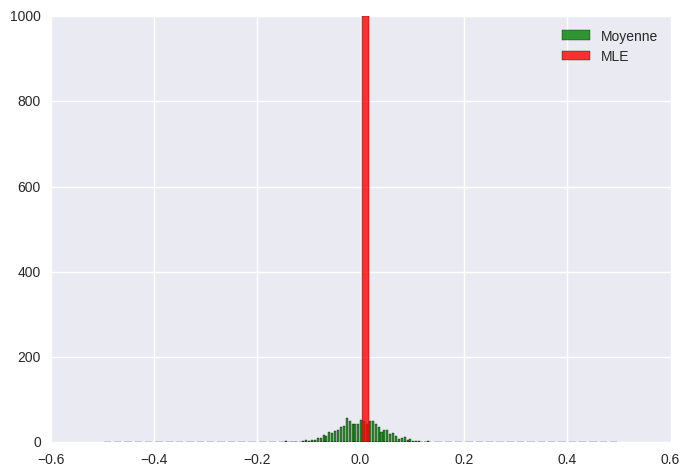

In [11]:
hist, bins = np.histogram(x_mean, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='g',alpha=0.8)
hist, bins = np.histogram(x_MLE, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='r',alpha=0.8)
plt.legend(['Moyenne','MLE'])

Ca marche plus que très bien pour estimer notre constante ! Même trop?